# Basis Encoding #

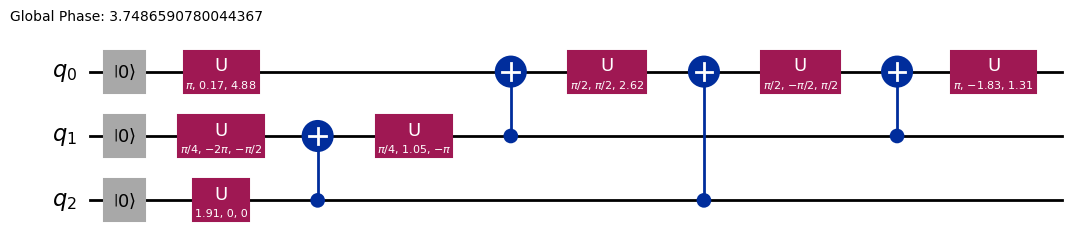

In [23]:
import math
import numpy as np
from qiskit import QuantumCircuit
 
desired_state = [1 / math.sqrt(3), 0, 0, 0, 0, 1 / math.sqrt(3), 0, 1 / math.sqrt(3)]
 
qc = QuantumCircuit(3)
qc.initialize(desired_state, [0, 1, 2])
qc.decompose(reps=8).draw(output="mpl")

# suppose a vector (5,7,0). ==> (∣101⟩+∣111⟩+∣000⟩)
# The below represents the value ​(∣101⟩+∣111⟩+∣000⟩)
# The corresponding number of the states are written in the desired_state list.
# ∣000⟩,∣001⟩,∣010⟩,∣011⟩,∣100⟩,∣101⟩,∣110⟩,∣111⟩
# 1  ,    0  ,    0  ,    0  ,    0  ,    1  ,    0  ,    1

[9.11515630e-05 1.00084416e-02 4.63018948e-03 6.61760347e-03
 2.75277720e-03 7.58381004e-06 3.51177804e-03 3.53449301e-03
 9.57291945e-04 1.57857917e-02 9.95229225e-04 3.08445951e-03
 1.09381876e-06 5.19563909e-03 1.71364938e-03 5.04979659e-03
 3.57314127e-03 9.99258124e-01 3.09286004e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]

Circuit structure:


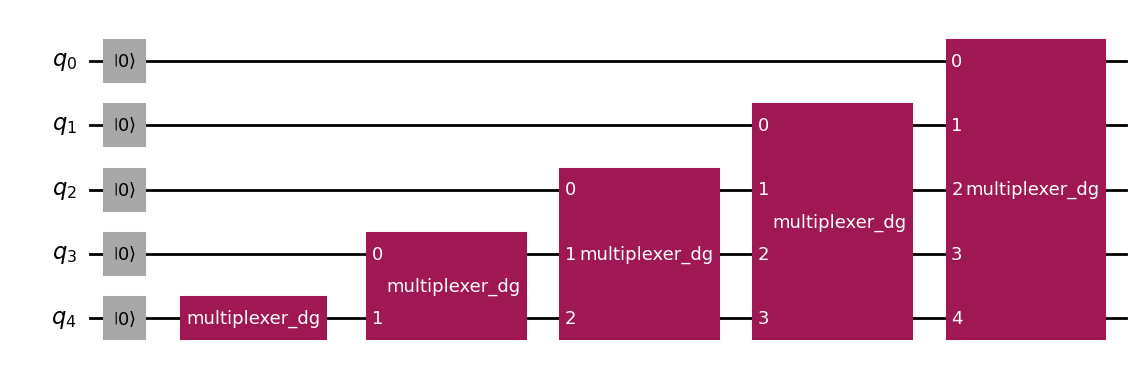

In [ ]:
def basis_encoding(vector,qubit_precision=None):
    
    # norm = np.linalg.norm(vector)
    # if norm == 0:
    #     raise ValueError("Zero vector cannot be normalized")
    # normalized = vector / norm

    # # Create a quantum circuit
    # qc = QuantumCircuit(len(vector))
    # qc.initialize(normalized, range(len(vector)))
    # return qc
    
    vector = np.array(vector, dtype=float)
    vector_norm = np.linalg.norm(vector)
    if vector_norm == 0:
        raise ValueError("Input vector cannot be all zeros")
    
    normalized_vector = vector / vector_norm
    
    # Determine number of qubits needed
    if qubit_precision is None:
        # Calculate minimum qubits needed to represent the vector
        n_qubits = int(np.ceil(np.log2(len(normalized_vector))))
        # Ensure we have at least 1 qubit
        n_qubits = max(1, n_qubits)
    else:
        n_qubits = qubit_precision
    
    target_dim = 2 ** n_qubits
    
    if len(normalized_vector) > target_dim:
        # Truncate if vector is too long
        padded_vector = normalized_vector[:target_dim]
        print(f"Warning: Vector truncated from {len(normalized_vector)} to {target_dim} elements")
    else:
        # Pad with zeros if vector is too short
        padded_vector = np.zeros(target_dim)
        padded_vector[:len(normalized_vector)] = normalized_vector
        
    padded_norm = np.linalg.norm(padded_vector)
    if padded_norm > 0:
        padded_vector = padded_vector / padded_norm
    
    print(padded_vector)
        
    qc = QuantumCircuit(n_qubits)
    
    # Initialize the quantum state with our normalized vector
    qc.initialize(padded_vector, range(n_qubits))
    
    return qc
    
example_features =  {
    "no_strokes": 5,
    "no_points": 549,
    "avg_stroke_length": 253.983,
    "bbox_width": 363,
    "bbox_height": 151,
    "aspect_ratio": 0.416,
    "centroid_x": 192.634,
    "centroid_y": 193.88,
    "compactness": 52.511,
    "convex_hull_area": 865.909,
    "horizontal_symmetry": 54.592,
    "vertical_symmetry": 169.194,
    "straightness": 0.06,
    "start_x": 285,
    "start_y": 94,
    "end_x": 277,
    "end_y": 196,
    "area": 54813,
    "perimeter": 1696.548
  }

l = [values for values in example_features.values()]

qc = basis_encoding(l)

print("\nCircuit structure:")
qc.decompose(reps=3).draw(output="mpl")

# Amplitude Encoding #

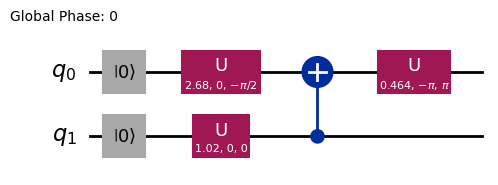

In [ ]:
desired_state = [
    1 / math.sqrt(105) * 4,
    1 / math.sqrt(105) * 8,
    1 / math.sqrt(105) * 5,
    1 / math.sqrt(105) * 0,
]
 
qc = QuantumCircuit(2)
qc.initialize(desired_state, [0, 1])
 
qc.decompose(reps=5).draw(output="mpl")

# X = (4,8,5)

[9.11515630e-05 1.00084416e-02 4.63018948e-03 6.61760347e-03
 2.75277720e-03 7.58381004e-06 3.51177804e-03 3.53449301e-03
 9.57291945e-04 1.57857917e-02 9.95229225e-04 3.08445951e-03
 1.09381876e-06 5.19563909e-03 1.71364938e-03 5.04979659e-03
 3.57314127e-03 9.99258124e-01 3.09286004e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]

Circuit structure:


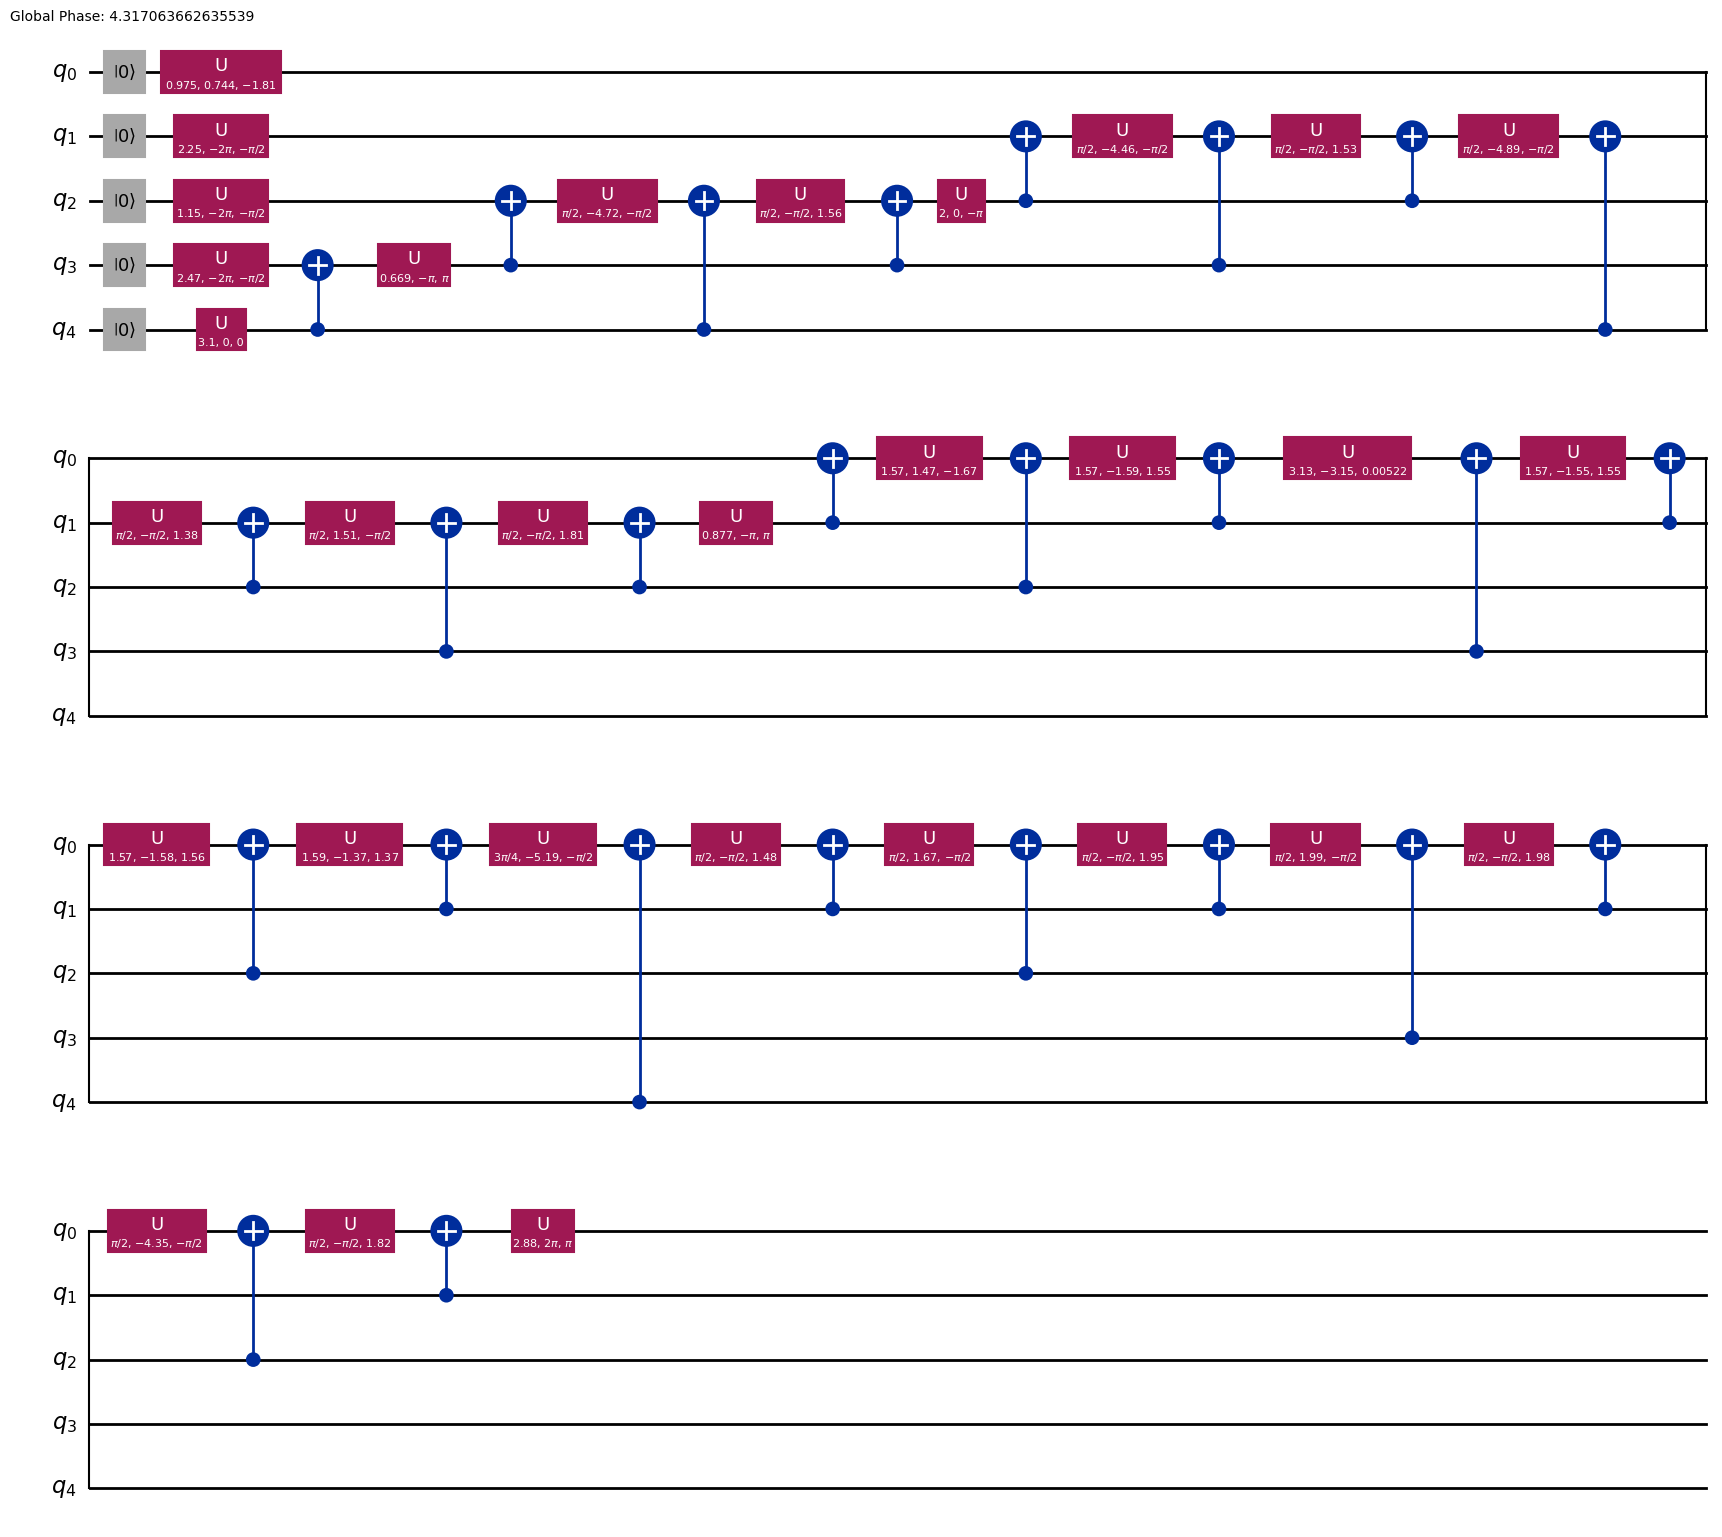

In [33]:
def amplitude_encoding(X):
    """
    Encode features as quantum amplitudes with proper padding to power of 2.
    """
    X = np.array(X)
    
    # Normalize the input features
    X_normalized = X / np.linalg.norm(X)
    
    n_features = len(X_normalized)
    n_qubits = int(np.ceil(np.log2(n_features))) if n_features > 1 else 1
    n_amplitudes = 2 ** n_qubits
    
    X_padded = np.zeros(n_amplitudes)
    X_padded[:n_features] = X_normalized
    
    # Renormalize after padding (important!)
    X_padded = X_padded / np.linalg.norm(X_padded)
    
    # Create quantum circuit with correct number of qubits
    qc = QuantumCircuit(n_qubits)
    
    # Initialize the quantum state
    qc.initialize(X_padded, range(n_qubits))
    
    return qc, X_padded

  
example_features =  {
    "no_strokes": 5,
    "no_points": 549,
    "avg_stroke_length": 253.983,
    "bbox_width": 363,
    "bbox_height": 151,
    "aspect_ratio": 0.416,
    "centroid_x": 192.634,
    "centroid_y": 193.88,
    "compactness": 52.511,
    "convex_hull_area": 865.909,
    "horizontal_symmetry": 54.592,
    "vertical_symmetry": 169.194,
    "straightness": 0.06,
    "start_x": 285,
    "start_y": 94,
    "end_x": 277,
    "end_y": 196,
    "area": 54813,
    "perimeter": 1696.548
  }

l = [values for values in example_features.values()]

qc, padded = amplitude_encoding(l)

print(padded)

print("\nCircuit structure:")
qc.decompose(reps=5).draw(output="mpl")

# Angle Encoding #

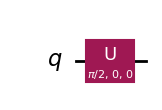

In [37]:
from qiskit.quantum_info import Statevector
from math import pi
 
qc = QuantumCircuit(1)
state1 = Statevector.from_instruction(qc)
qc.ry(pi / 2, 0)  # Phase gate rotates by an angle pi/2
state2 = Statevector.from_instruction(qc)
states = state1, state2

qc.decompose(reps=5).draw(output="mpl")

Single qubit state dimension: 2^1 = 2
Multi-qubit state dimension: 2^19 = 524288
Angles used: [2.86573683e-06 3.14657904e-04 1.45569687e-04 2.08052494e-04
 8.65452522e-05]...
State vector length: 524288


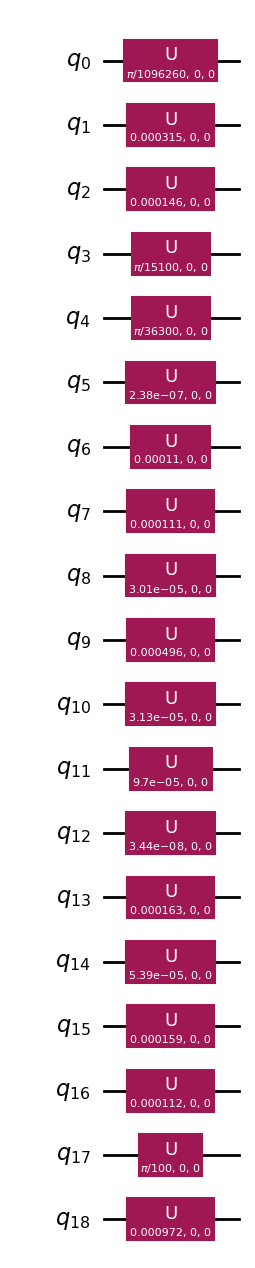

In [39]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

def angle_encoding(features_dict, scaling_factor=0.01):
    features = np.array(list(features_dict.values()))
    n_qubits = len(features)
    
    max_val = np.max(np.abs(features))
    angles = (features / max_val) * np.pi * scaling_factor
    
    qc = QuantumCircuit(n_qubits)
    
    for i, angle in enumerate(angles):
        qc.ry(angle, i)
    
    return qc, angles

# Your features
example_features = {
    "no_strokes": 5,
    "no_points": 549,
    "avg_stroke_length": 253.983,
    "bbox_width": 363,
    "bbox_height": 151,
    "aspect_ratio": 0.416,
    "centroid_x": 192.634,
    "centroid_y": 193.88,
    "compactness": 52.511,
    "convex_hull_area": 865.909,
    "horizontal_symmetry": 54.592,
    "vertical_symmetry": 169.194,
    "straightness": 0.06,
    "start_x": 285,
    "start_y": 94,
    "end_x": 277,
    "end_y": 196,
    "area": 54813,
    "perimeter": 1696.548
}

qc_multi, angles = angle_encoding(example_features)
state_multi = Statevector.from_instruction(qc_multi)

print(f"Single qubit state dimension: 2^1 = {2**1}")
print(f"Multi-qubit state dimension: 2^{qc_multi.num_qubits} = {2**qc_multi.num_qubits}")
print(f"Angles used: {angles[:5]}...")  # First 5 angles
print(f"State vector length: {len(state_multi.data)}")

qc_multi.decompose(reps=5).draw(output="mpl")